In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tasks

Let $f(x) = 2x \sin (2\pi x) + 3$ be a function defined on the interval $I=[0,1]$.
Consider a uniform mesh of $I$ with $n=5$ subintervals, which has 6 nodes $\{x_i\}_{i=0}^5$.

Find:
1.  The continuous piecewise linear interpolant, $\pi_h f(x) = \sum_{i=0}^5 f(x_i)\phi_i(x)$.
2.  The $L_2$-projection, $P_h f(x)$, onto the same mesh.


In [9]:
def interpolant_1d(x_nodes, f_vals, x_eval):
    x_eval = np.asarray(x_eval)
    y = np.empty_like(x_eval, dtype=float)
    
    h = x_nodes[1] - x_nodes[0]
    n = len(x_nodes) - 1

    for k, x in enumerate(x_eval):
        if x <= x_nodes[0]:
            y[k] = f_vals[0]
            continue
        if x >= x_nodes[-1]:
            y[k] = f_vals[-1]
            continue

        # subinterval index
        i = int((x - x_nodes[0]) // h)
        if i == n:   # boundary case
            i = n-1

        x_i, x_ip1 = x_nodes[i], x_nodes[i+1]

        y[k] = f_vals[i]   * (x_ip1 - x)/h \
             + f_vals[i+1] * (x - x_i)/h

    return y

In [11]:
def l2_projector_1d(x, f_vals, f):
    """
    Compute the L^2–projection of f onto the P1 finite element space 
    defined by the nodal points x.

    Parameters
    ----------
    x : array_like
        Nodal points (size n+1).
    f_vals : array_like
        Values of f at the nodes (same size as x).
    f : callable
        Original function f(x). Not required for the projection itself,
        but kept to match the function signature.

    Returns
    -------
    c : ndarray
        Coefficients of the L^2 projection, i.e., nodal values of P_h f.
    """
    n = len(x) - 1        # number of elements
    M = np.zeros((n + 1, n + 1))   # global mass matrix
    b_vec = np.zeros(n + 1)        # global load vector

    for i in range(n):
        h = x[i+1] - x[i]

        # Local mass matrix: (h/6) * [[2, 1], [1, 2]]
        M_loc = (h / 6.0) * np.array([[2.0, 1.0],
                                      [1.0, 2.0]])

        # Assemble into global mass matrix
        M[i:i+2, i:i+2] += M_loc

        # Local load vector: (h/2) * [f(x_i), f(x_{i+1})]^T
        f0, f1 = f_vals[i], f_vals[i+1]
        b_loc = (h / 2.0) * np.array([f0, f1])

        # Assemble into global load vector
        b_vec[i:i+2] += b_loc

    # Solve the linear system M c = b
    c = np.linalg.solve(M, b_vec)
    return c

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/var/folders/jq/xshncj9j3571ygk72m_rkz000000gn/T/ipykernel_9049/122025404.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(xe, If, '-', label='Interpolant $\pi f(x)$')


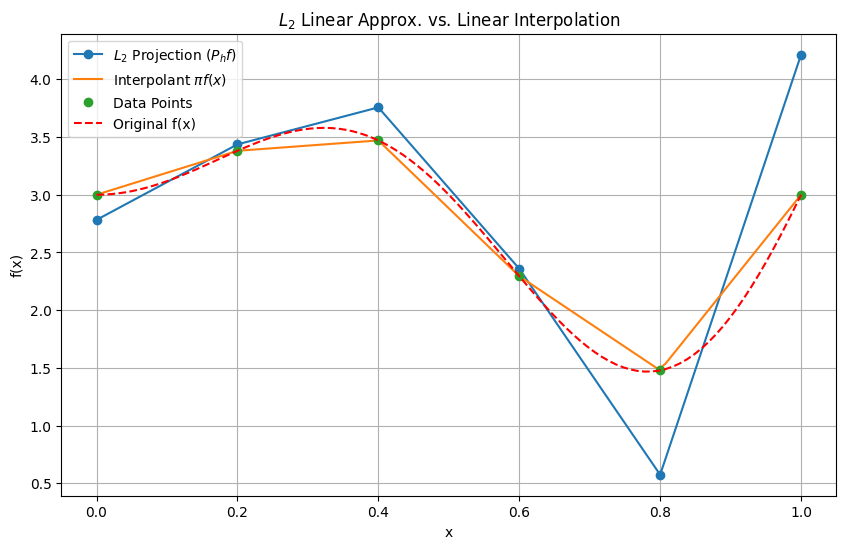

In [12]:
# Input data
n = 5  # number of subintervals
a, b = 0, 1
f = lambda x: 2*x*np.sin(2*np.pi*x) + 3

# nodal points and function values
x = np.linspace(a, b, n + 1)
f_vals = f(x) 

# L^2 projection
Pf = l2_projector_1d(x,f_vals,f)

# linear interpolation
xe = np.linspace(a, b, 100)
If = interpolant_1d(x,f_vals,xe)


# plot L^2 projection
plt.figure(figsize=(10, 6))
plt.plot(x, Pf, 'o-', label='$L_2$ Projection ($P_h f$)')
plt.plot(xe, If, '-', label='Interpolant $\pi f(x)$')
plt.plot(x, f(x), 'o', label='Data Points')

# Plot the original function for comparison
plt.plot(xe, f(xe), 'r--', label='Original f(x)')

plt.title('$L_2$ Linear Approx. vs. Linear Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()